## **BACK-ORDERS PREDICTION SUPPLY CHAIN**

**DATA WRANGLING**

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
#for correlation using chi square test.
import scipy.stats as st
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/product_train.csv")
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3921548,8,12,0,0,0,0,1,1,2,...,0,0.63,0.75,0,No,No,No,Yes,No,No
1,3191009,83,2,33,157,377,603,44,98,148,...,0,0.68,0.66,0,No,No,No,Yes,No,No
2,2935810,8,4,0,0,0,0,0,0,1,...,0,0.73,0.78,0,No,No,No,Yes,No,No
3,2205847,31,4,63,70,160,223,27,90,164,...,0,0.73,0.78,0,No,No,Yes,Yes,No,No
4,4953497,3,12,0,0,0,0,0,0,0,...,0,0.81,0.74,0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250073,3129822,74,8,0,0,0,0,6,18,28,...,0,0.87,0.71,0,No,No,No,Yes,No,No
250074,3100168,7,12,0,0,1,4,1,4,5,...,0,0.73,0.79,0,No,No,No,Yes,No,No
250075,3860965,2,8,0,0,0,0,0,0,0,...,0,0.80,0.79,0,No,No,Yes,Yes,No,No
250076,3477768,37,8,1,14,28,49,9,25,49,...,0,0.97,0.95,0,No,No,No,Yes,No,No


In [ ]:
print("DF shape: ", df.shape)

DF shape:  (250078, 23)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250078 entries, 0 to 250077
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                250078 non-null  int64  
 1   national_inv       250078 non-null  int64  
 2   lead_time          250078 non-null  int64  
 3   in_transit_qty     250078 non-null  int64  
 4   forecast_3_month   250078 non-null  int64  
 5   forecast_6_month   250078 non-null  int64  
 6   forecast_9_month   250078 non-null  int64  
 7   sales_1_month      250078 non-null  int64  
 8   sales_3_month      250078 non-null  int64  
 9   sales_6_month      250078 non-null  int64  
 10  sales_9_month      250078 non-null  int64  
 11  min_bank           250078 non-null  int64  
 12  potential_issue    250078 non-null  object 
 13  pieces_past_due    250078 non-null  int64  
 14  perf_6_month_avg   250078 non-null  float64
 15  perf_12_month_avg  250078 non-null  float64
 16  lo

In [ ]:
#changing the column names
new_column=['product_id', 'current_inventory', 'transit_duration', 'transit_quantity',
                   'forecast_sales_3_months', 'forecast_sales_6_months', 'forecast_sales_9_months',
                   'prior_sales_1_month', 'prior_sales_3_month', 'prior_sales_6_month',
                   'prior_sales_9_month', 'minimum_recommend_stock', 'source_has_issue',
                   'source_overdue', 'source_performance_6_months', 'source_performance_12_months',
                   'stock_overdue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy',
                   'rev_stop', 'went_on_backorder']
df.columns=new_column

In [ ]:
df.describe()

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue
count,2.500780e+05,2.500780e+05,250078.000000,250078.000000,2.500780e+05,2.500780e+05,2.500780e+05,250078.000000,2.500780e+05,2.500780e+05,2.500780e+05,250078.000000,250078.000000,250078.000000,250078.000000,250078.000000
mean,3.445092e+06,3.530814e+02,7.831764,43.495673,1.928422e+02,3.618791e+02,5.306028e+02,54.319968,1.785464e+02,3.532202e+02,5.353359e+02,51.258775,1.746255,0.772383,0.776106,0.682995
std,7.774587e+05,5.734557e+03,6.760722,1076.528522,5.728252e+03,1.012271e+04,1.468183e+04,1562.466565,5.188470e+03,1.016469e+04,1.568775e+04,1111.366140,180.670668,0.241953,0.230465,42.306053
min,2.065611e+06,-3.034000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.984056e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.700000,0.690000,0.000000
50%,3.409472e+06,1.400000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,3.000000e+00,4.000000e+00,0.000000,0.000000,0.830000,0.830000,0.000000
75%,3.832655e+06,7.600000e+01,9.000000,0.000000,6.000000e+00,1.600000e+01,2.600000e+01,5.000000,1.600000e+01,3.300000e+01,5.000000e+01,3.000000,0.000000,0.970000,0.960000,0.000000
max,4.986449e+06,1.165770e+06,52.000000,276703.000000,1.242940e+06,2.056820e+06,3.103460e+06,358011.000000,1.094112e+06,2.123946e+06,3.182148e+06,196869.000000,54868.000000,1.000000,1.000000,12000.000000


In [ ]:
df.describe(include = ['object'])
#we can observe that there are only 3 unique values for all categorical columns

,source_has_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,250078,250078,250078,250078,250078,250078,250078
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,249944,206295,250036,221402,243586,250018,248463


In [ ]:
#checking null values
df.isnull().sum()

product_id                      0
current_inventory               0
transit_duration                0
transit_quantity                0
forecast_sales_3_months         0
forecast_sales_6_months         0
forecast_sales_9_months         0
prior_sales_1_month             0
prior_sales_3_month             0
prior_sales_6_month             0
prior_sales_9_month             0
minimum_recommend_stock         0
source_has_issue                0
source_overdue                  0
source_performance_6_months     0
source_performance_12_months    0
stock_overdue                   0
deck_risk                       0
oe_constraint                   0
ppap_risk                       0
stop_auto_buy                   0
rev_stop                        0
went_on_backorder               0
dtype: int64

NO MISSING VALUES OR NAN VALUES

<ipython-input-9-714099e9bce1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  col_corr=df.corr()


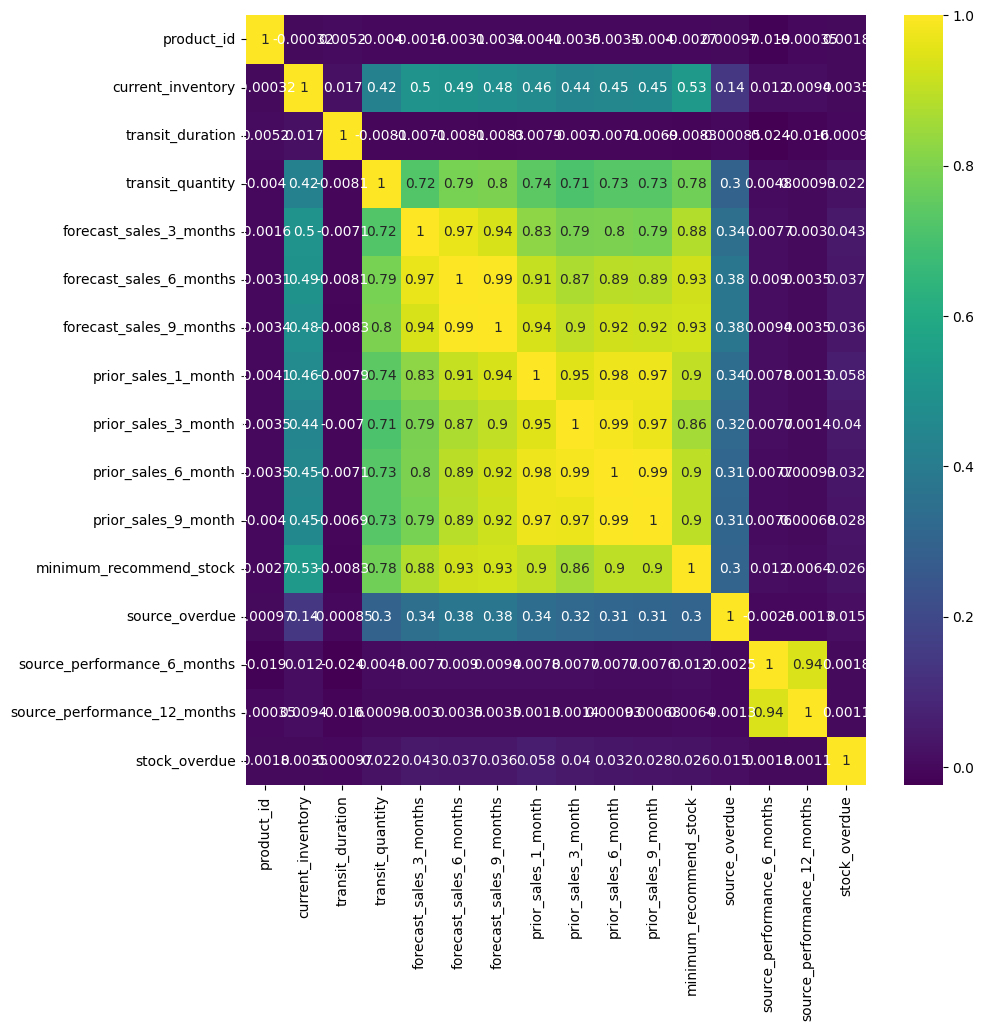

In [ ]:
#finding correlation
fig=plt.subplots(figsize=(10,10))
col_corr=df.corr()
ax=sns.heatmap(col_corr,annot=True,cmap='viridis')
plt.show("Correlation Heatmap")

[Text(0.5, 1.0, 'Transit Duration Range and Distribution')]

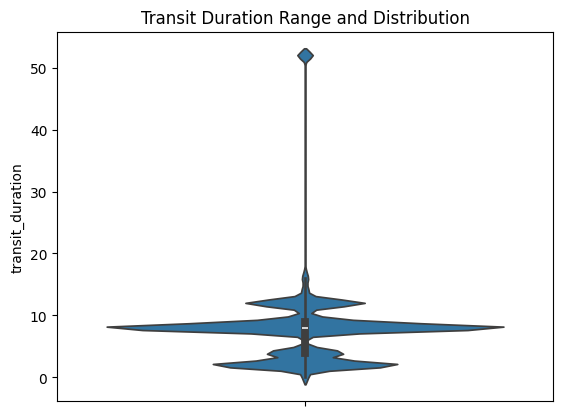

In [ ]:
#View the range and distribution through the violinplots
sns.violinplot(df.transit_duration).set(title='Transit Duration Range and Distribution')

In [ ]:
#checking for the duplicates in the product_id field
df['product_id'].duplicated().sum()

0

HANDLING THE REPETITIVE VALUES

[Text(0.5, 1.0, 'forecast sales of 3 months')]

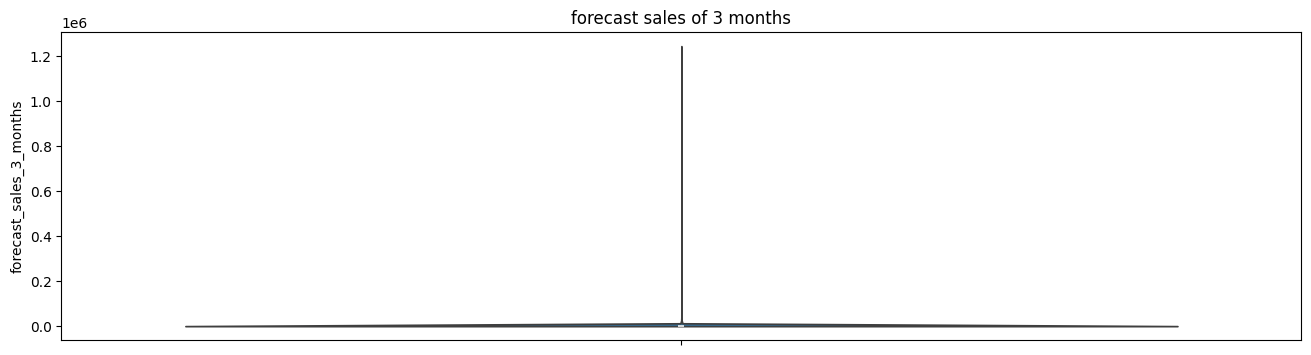

In [ ]:
plt.figure(figsize=(16,4))
sns.violinplot(df.forecast_sales_3_months).set(title='forecast sales of 3 months')


In [ ]:
#Calculating the percentage of repeatitions of 0's in each column
perct_0 = {column: '%2.2f' %(((df[column] == 0).sum()/df.shape[0])*100)+'%' for column in df.columns
                             if df[column].dtype == np.float64}
perct_0

{'source_performance_6_months': '2.60%',
 'source_performance_12_months': '2.07%'}

In [ ]:
#Dropping the columns with the percentage of 0's more than 60%
df = df.drop(['transit_quantity', 'forecast_sales_3_months', 'forecast_sales_6_months',
                             'forecast_sales_9_months', 'source_overdue', 'stock_overdue'], axis = 1)

In [ ]:
df.shape

(250078, 17)

HANDLING OUTLIERS

<Axes: ylabel='source_performance_12_months'>

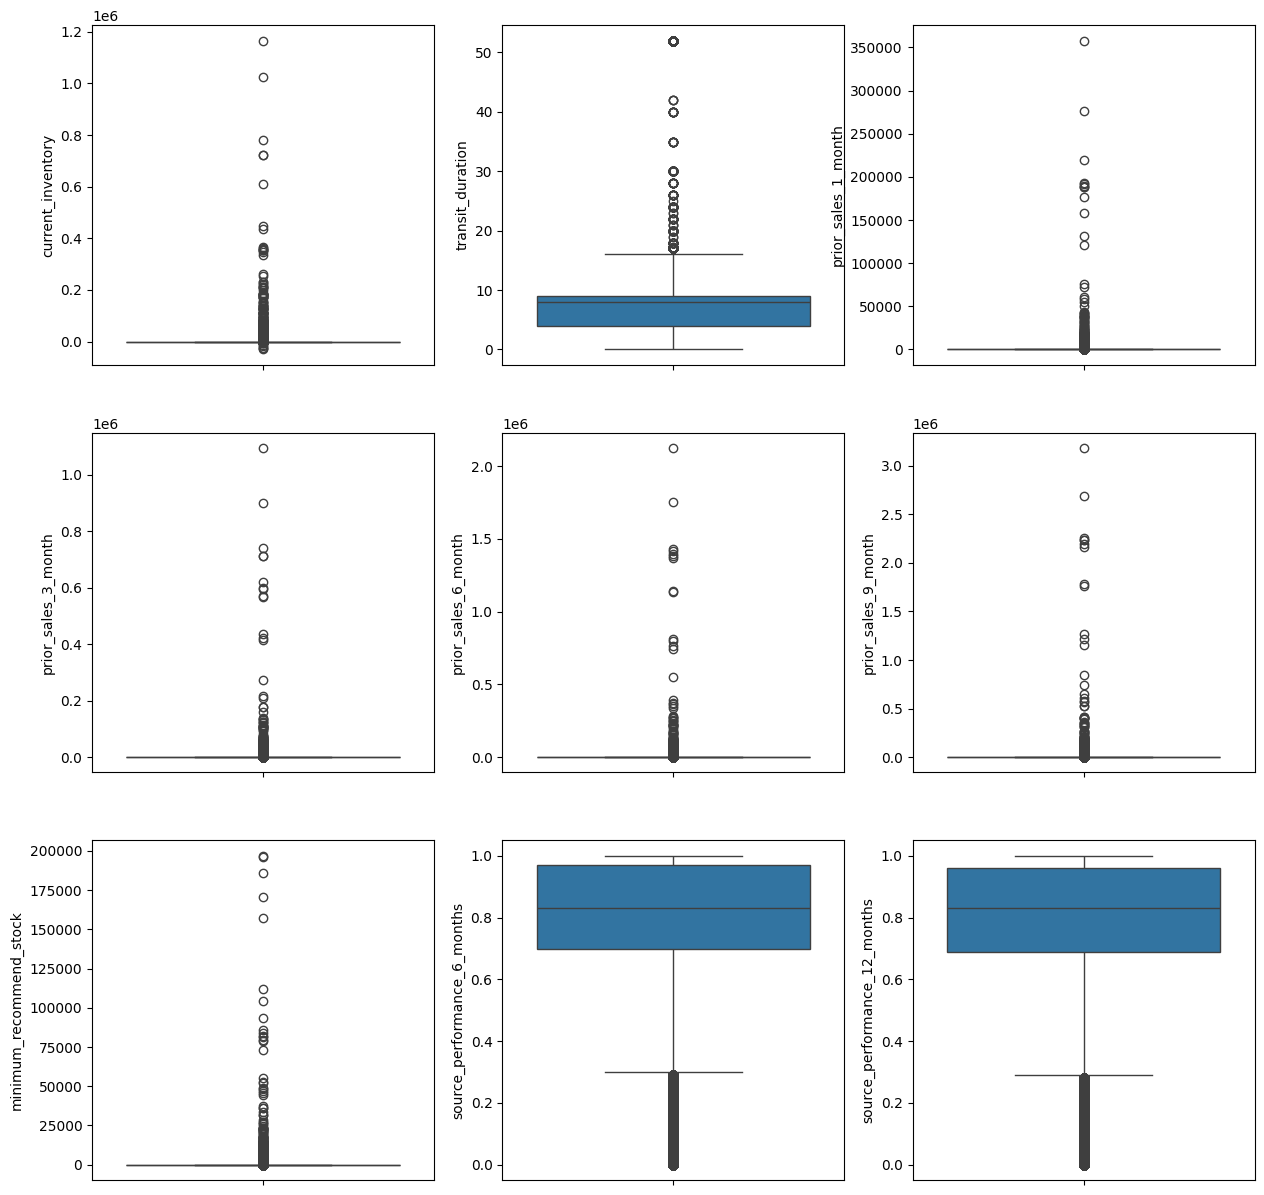

In [ ]:
nrows = 3
ncols = 3
fig, ax1 = plt.subplots(nrows, ncols, figsize = (15, 15))
sns.boxplot(df.current_inventory, ax = ax1[0,0])
sns.boxplot(df.transit_duration, ax = ax1[0,1])
sns.boxplot(df.prior_sales_1_month, ax = ax1[0,2])
sns.boxplot(df.prior_sales_3_month, ax = ax1[1,0])
sns.boxplot(df.prior_sales_6_month, ax = ax1[1,1])
sns.boxplot(df.prior_sales_9_month, ax = ax1[1,2])
sns.boxplot(df.minimum_recommend_stock, ax = ax1[2,0])
sns.boxplot(df.source_performance_6_months, ax = ax1[2,1])
sns.boxplot(df.source_performance_12_months, ax = ax1[2,2])

In [ ]:
def get_outlier_boundaries(column):
    q75, q25 =  np.percentile(column, [75, 25])
    iqr = q75 - q25
    lower = q25 - 1.5*iqr
    upper = q75 + 1.5*iqr
    return lower,upper

In [ ]:
transit_duration_upper = get_outlier_boundaries(df.transit_duration)[1]
transit_duration_lower = get_outlier_boundaries(df.transit_duration)[0]
print(transit_duration_upper, transit_duration_lower)
outlier_transit_duration = df[df.transit_duration > transit_duration_upper]
#print(outlier_transit_duration.shape)
outlier_transit_duration.went_on_backorder.value_counts()

16.5 -3.5


No     5077
Yes       5
Name: went_on_backorder, dtype: int64

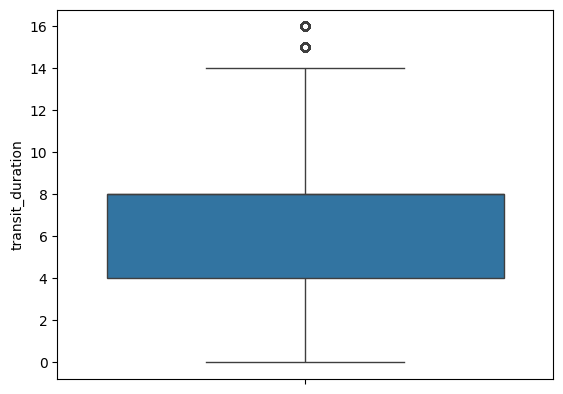

In [ ]:
df = df.drop(outlier_transit_duration.index)
cleaned_ = sns.boxplot(df.transit_duration)

<ipython-input-21-5a014993eb84>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.transit_duration)


<Axes: xlabel='transit_duration', ylabel='Density'>

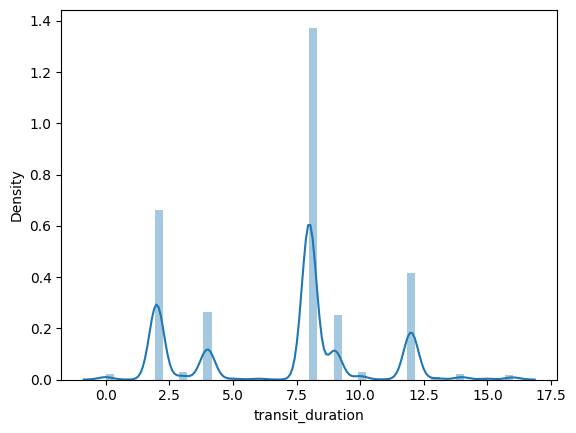

In [ ]:
sns.distplot(df.transit_duration)

In [ ]:
#dropping outliers of minimum recommended stock
outlier_minimum_recommended_stock = df[df.minimum_recommend_stock > 250000]
outlier_minimum_recommended_stock.shape
#print(outlier_minimum_recommended_stock)

(0, 17)

In [ ]:
#lets delete the outlier of the minimum_recommend_stock
df = df.drop(outlier_minimum_recommended_stock.index, errors = 'ignore')

In [ ]:
outlier_current_inventory = df[df.current_inventory > .2e07]
outlier_current_inventory.shape
#since the count is low, we can drop these records
df = df.drop(outlier_current_inventory.index, errors = 'ignore')

In [ ]:
df.to_csv('Trackorder.csv', index = False)

**EDA FOR THE DATA**

In [ ]:
masterData=pd.read_csv("/content/Trackorder.csv")
masterData

,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3921548,8,12,1,1,2,5,2,No,0.63,0.75,No,No,No,Yes,No,No
1,3191009,83,2,44,98,148,156,53,No,0.68,0.66,No,No,No,Yes,No,No
2,2935810,8,4,0,0,1,1,0,No,0.73,0.78,No,No,No,Yes,No,No
3,2205847,31,4,27,90,164,219,0,No,0.73,0.78,No,No,Yes,Yes,No,No
4,4953497,3,12,0,0,0,0,0,No,0.81,0.74,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244991,3129822,74,8,6,18,28,45,9,No,0.87,0.71,No,No,No,Yes,No,No
244992,3100168,7,12,1,4,5,8,0,No,0.73,0.79,No,No,No,Yes,No,No
244993,3860965,2,8,0,0,0,0,0,No,0.80,0.79,No,No,Yes,Yes,No,No
244994,3477768,37,8,9,25,49,81,12,No,0.97,0.95,No,No,No,Yes,No,No


In [ ]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244996 entries, 0 to 244995
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   product_id                    244996 non-null  int64  
 1   current_inventory             244996 non-null  int64  
 2   transit_duration              244996 non-null  int64  
 3   prior_sales_1_month           244996 non-null  int64  
 4   prior_sales_3_month           244996 non-null  int64  
 5   prior_sales_6_month           244996 non-null  int64  
 6   prior_sales_9_month           244996 non-null  int64  
 7   minimum_recommend_stock       244996 non-null  int64  
 8   source_has_issue              244996 non-null  object 
 9   source_performance_6_months   244996 non-null  float64
 10  source_performance_12_months  244996 non-null  float64
 11  deck_risk                     244996 non-null  object 
 12  oe_constraint                 244996 non-nul

In [ ]:
masterData = masterData.drop(['oe_constraint', 'rev_stop', 'source_has_issue'], axis = 1)

In [ ]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244996 entries, 0 to 244995
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   product_id                    244996 non-null  int64  
 1   current_inventory             244996 non-null  int64  
 2   transit_duration              244996 non-null  int64  
 3   prior_sales_1_month           244996 non-null  int64  
 4   prior_sales_3_month           244996 non-null  int64  
 5   prior_sales_6_month           244996 non-null  int64  
 6   prior_sales_9_month           244996 non-null  int64  
 7   minimum_recommend_stock       244996 non-null  int64  
 8   source_performance_6_months   244996 non-null  float64
 9   source_performance_12_months  244996 non-null  float64
 10  deck_risk                     244996 non-null  object 
 11  ppap_risk                     244996 non-null  object 
 12  stop_auto_buy                 244996 non-nul

In [ ]:
subset_masterData = masterData.sample(5000)
sourceperf_corr_df = subset_masterData[['source_performance_6_months', 'source_performance_12_months']]
sourceperf_corr = sourceperf_corr_df.corr()
sourceperf_corr

,source_performance_6_months,source_performance_12_months
source_performance_6_months,1.000000,0.941906
source_performance_12_months,0.941906,1.000000


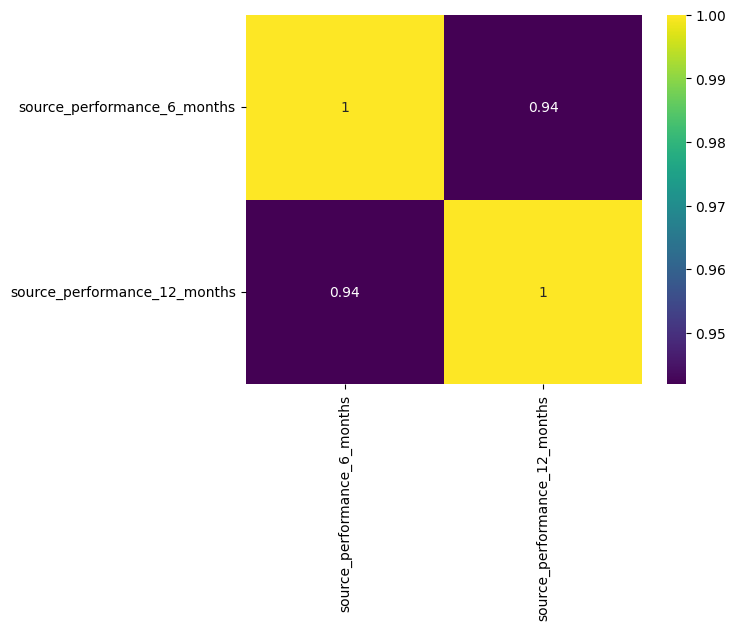

In [ ]:
#CORRELATION PLOT
corr_plot = sns.heatmap(sourceperf_corr, annot = True,cmap='viridis')
corr_plot.figure.savefig('corr1.png', dpi=500,bbox_inches='tight')

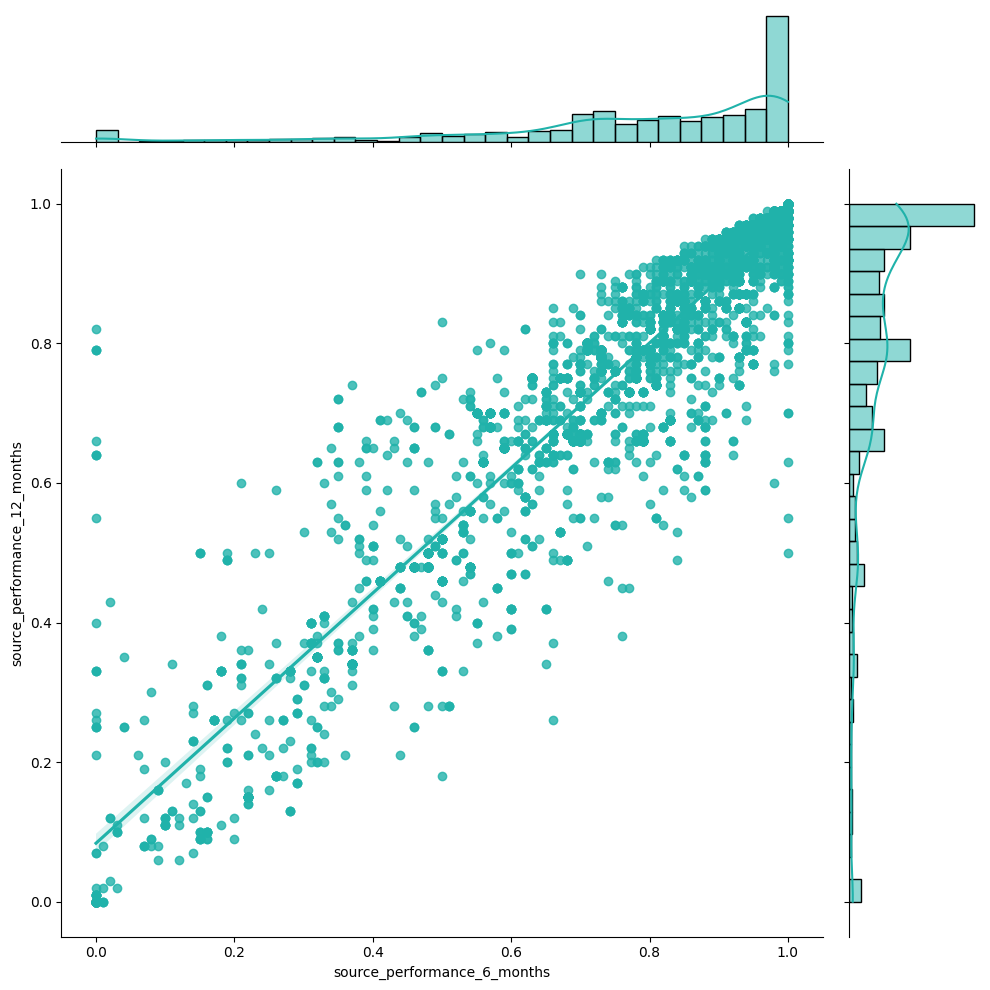

In [ ]:
scattered_plot = sns.jointplot(x='source_performance_6_months', y='source_performance_12_months', data=subset_masterData, kind='reg', color='lightseagreen', height=10)
scattered_plot.savefig('corr111.png', dpi=500)

We can observe that the expected performance over 6 and 12 months period are correlated.

In [ ]:
prior_sales_corr_df = subset_masterData[['prior_sales_1_month', 'prior_sales_3_month', 'prior_sales_6_month',
                                        'prior_sales_9_month']]
prior_sales_corr = prior_sales_corr_df.corr()
prior_sales_corr

,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month
prior_sales_1_month,1.000000,0.975376,0.965211,0.969420
prior_sales_3_month,0.975376,1.000000,0.985708,0.985906
prior_sales_6_month,0.965211,0.985708,1.000000,0.995754
prior_sales_9_month,0.969420,0.985906,0.995754,1.000000


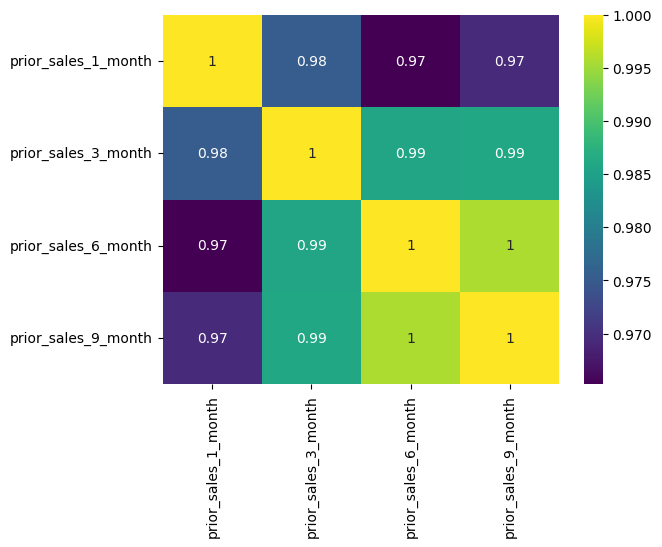

In [ ]:
corr_plot_2 = sns.heatmap(prior_sales_corr, annot = True,cmap='viridis')

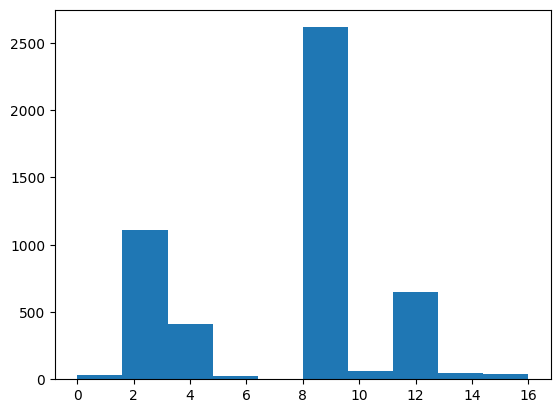

In [41]:
bar_plot = plt.hist(subset_masterData.transit_duration)

It can be observed that most of the transit_duration is between 2-24 with the highest peak transition is for 8 weeks.

<Axes: xlabel='went_on_backorder', ylabel='transit_duration'>

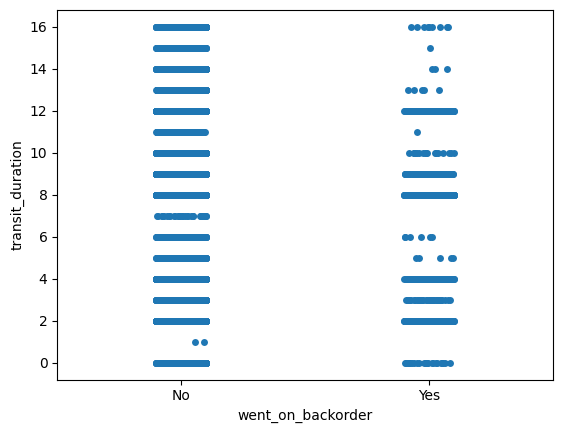

In [42]:
sns.stripplot(x = 'went_on_backorder', y = 'transit_duration', data = masterData, jitter = True)

<ipython-input-43-d780357502b6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='went_on_backorder', y ='transit_duration', data = subset_masterData,


<Axes: xlabel='went_on_backorder', ylabel='transit_duration'>

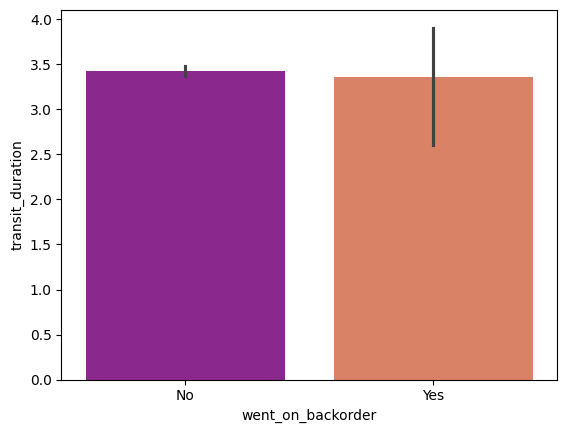

In [43]:
sns.barplot(x ='went_on_backorder', y ='transit_duration', data = subset_masterData,
            palette ='plasma', estimator = np.std)

(0.0, 5000.0)

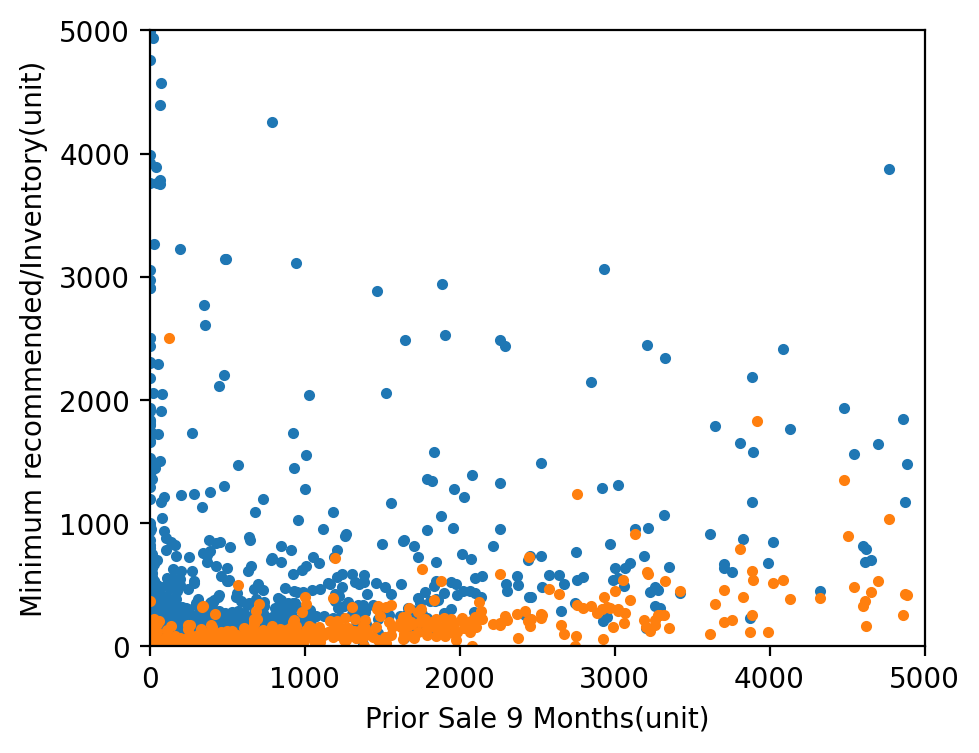

In [44]:
plt.figure(figsize=(5,4),dpi=200)

plt.plot(subset_masterData.prior_sales_9_month, subset_masterData.current_inventory, marker = '.', linestyle = 'None' )
plt.xlabel('Prior Sale 9 Months(unit)')
plt.ylabel('Current Inventory(unit)')
plt.plot(subset_masterData.prior_sales_9_month, subset_masterData.minimum_recommend_stock, marker = '.', linestyle = 'None' )
plt.xlabel('Prior Sale 9 Months(unit)')
plt.ylabel('Minimum recommended/Inventory(unit)')
plt.xlim(0,5000)
plt.ylim(0,5000)

We will use the chi square to find the relation between target variable with other categorical variable.

<Axes: xlabel='deck_risk', ylabel='count'>

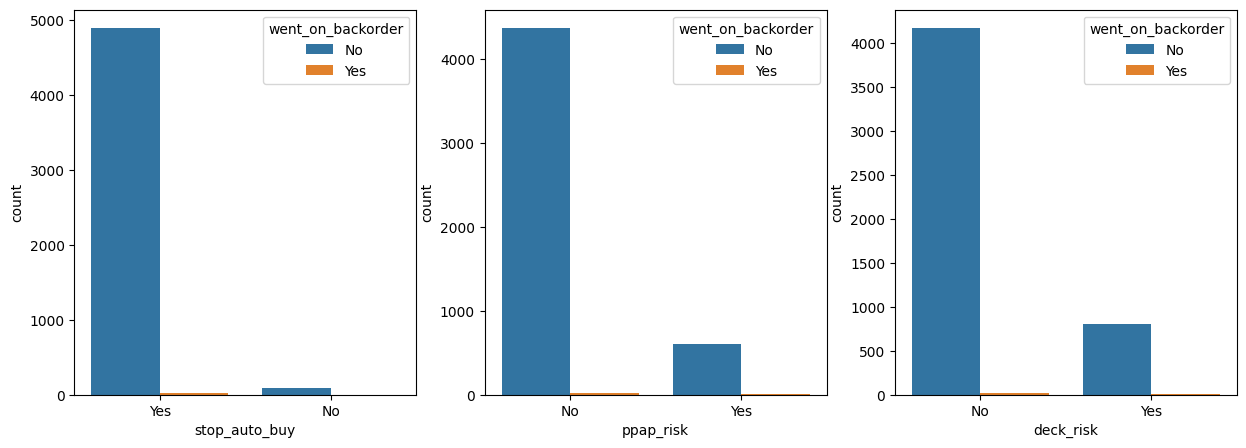

In [50]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
sns.countplot(x='stop_auto_buy', hue='went_on_backorder', data=subset_masterData, ax=ax[0])
sns.countplot(x='ppap_risk', hue='went_on_backorder', data=subset_masterData, ax=ax[1])
sns.countplot(x='deck_risk', hue='went_on_backorder', data=subset_masterData, ax=ax[2])

In [51]:
masterData['deck_risk_n'] = masterData.deck_risk.map({'Yes':1, 'No':0})
masterData['ppap_risk_n'] = masterData.ppap_risk.map({'Yes':1, 'No':0})
masterData['stop_auto_buy_n'] = masterData.stop_auto_buy.map({'Yes':1, 'No':0})

In [52]:
subset_masterData['deck_risk_n'] = subset_masterData.deck_risk.map({'Yes':1, 'No':0})
subset_masterData['ppap_risk_n'] = subset_masterData.ppap_risk.map({'Yes':1, 'No':0})
subset_masterData['stop_auto_buy_n'] = subset_masterData.stop_auto_buy.map({'Yes':1, 'No':0})

In [53]:
#deck_risk relation with the backorders
contingency_table_deck_risk = pd.crosstab(masterData.deck_risk, masterData.went_on_backorder)
contingency_table_deck_risk.columns = ['No', 'Yes']
contingency_table_deck_risk.index = ['No', 'Yes']
contingency_table_deck_risk

,No,Yes
No,203937,1379
Yes,39449,231


In [54]:
#ppap_risk relation with the backorders
contingency_table_ppap_risk = pd.crosstab(masterData.ppap_risk, masterData.went_on_backorder)
contingency_table_ppap_risk.columns = ['No', 'Yes']
contingency_table_ppap_risk.index = ['No', 'Yes']
contingency_table_ppap_risk

,No,Yes
No,215692,1396
Yes,27694,214


In [55]:
#stop_auto_buy relation with the backorders
contingency_table_stop_auto_buy = pd.crosstab(masterData.stop_auto_buy, masterData.went_on_backorder)
contingency_table_stop_auto_buy.columns = ['No', 'Yes']
contingency_table_stop_auto_buy.index = ['No', 'Yes']
contingency_table_stop_auto_buy

,No,Yes
No,4616,45
Yes,238770,1565


In [57]:
from scipy.stats import chi2_contingency, chi2

#Chi-square test for the deck_risk
chi_deck_risk, p_val_deck_risk, dof_deck_risk, exp_deck_risk = chi2_contingency(contingency_table_deck_risk)
chi2_critical = chi2.ppf(q = 0.95, df = dof_deck_risk)
print('Chi-Square Critical value:', chi2_critical)
print('chi_deck_risk:', chi_deck_risk)
print('p_val_deck_risk',p_val_deck_risk)
print('degree of freedom', dof_deck_risk)

Chi-Square Critical value: 3.841458820694124
chi_deck_risk: 3.943360165385846
p_val_deck_risk 0.047056695792690055
degree of freedom 1


In [61]:
from scipy.stats import chi2_contingency, chi2
#Chi-square test for ppap_risk
chi_ppap_risk, p_val_ppap_risk, dof_ppap_risk, exp_ppap_risk = st.chi2_contingency(contingency_table_ppap_risk)
chi2_critical = st.chi2.ppf(q = 0.95, df = dof_ppap_risk)
print('Chi-Square Critical value:', chi2_critical)
print('chi_ppap_risk:', chi_ppap_risk)
print('p_val_ppap_risk',p_val_ppap_risk)
print('degree of freedom', dof_ppap_risk)

Chi-Square Critical value: 3.841458820694124
chi_ppap_risk: 5.612669661921694
p_val_ppap_risk 0.01783107686640705
degree of freedom 1


In [62]:
#Chi-square test for stop_auto_buy
chi_stop_auto_buy, p_val_stop_auto_buy, dof_stop_auto_buy, exp_stop_auto_buy = st.chi2_contingency(contingency_table_stop_auto_buy)
chi2_critical = st.chi2.ppf(q = 0.95, df = dof_stop_auto_buy)
print('Chi-Square Critical value:', chi2_critical)
print('chi_stop_auto_buy:', chi_stop_auto_buy)
print('p_val_stop_auto_buy',p_val_stop_auto_buy)
print('degree of freedom', dof_stop_auto_buy)

Chi-Square Critical value: 3.841458820694124
chi_stop_auto_buy: 6.444908822014336
p_val_stop_auto_buy 0.011127075280324902
degree of freedom 1


**PRELIMINARY DATA ANALYSIS WITH SAMPLE DATA**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

AS A PART OF THE DATA ANALYSIS WE WORK WITH 30% OF THE DATA.


1.   10% FOR THE TRAINING AND TESTING THE DATA
2.   WE WILL VALIDATE ATHE MDOEL WITH SAMPLE DATA.

1.   PRECISION OF THE MODELS ARE VALIDATED USING THE RECALL_PRECISION_CURVE





In [64]:
#reading the file
masterData=pd.read_csv("/content/Trackorder.csv")

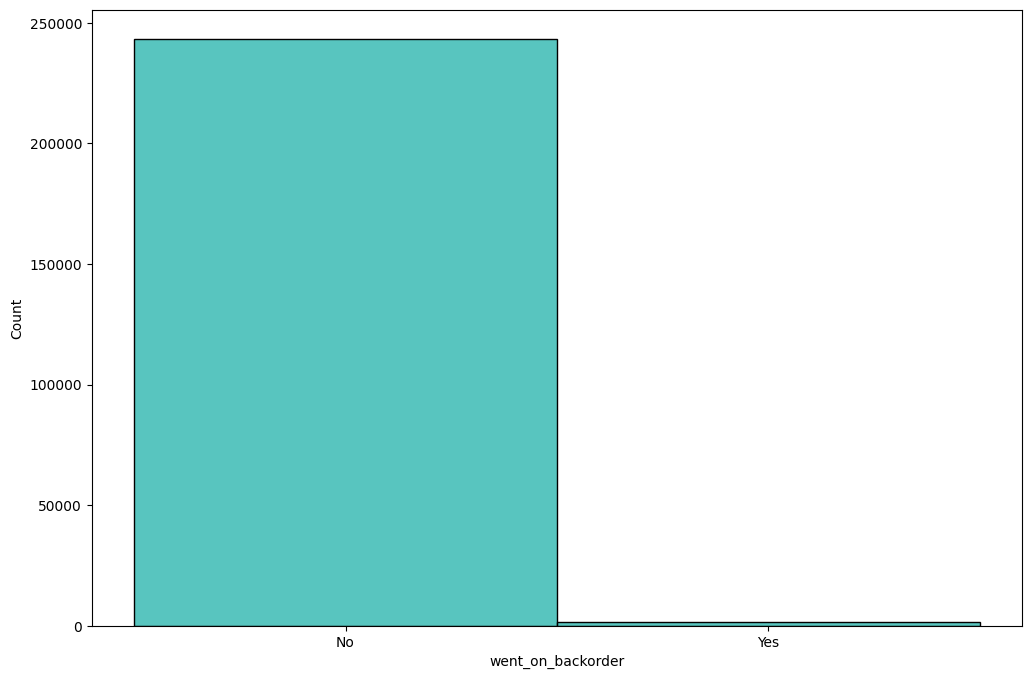

In [65]:
plt.figure(figsize=(12,8))
ax=sns.histplot(data=masterData,x='went_on_backorder',color='lightseagreen')
ax.figure.savefig('Mean.png', dpi=500,bbox_inches='tight')

In [66]:
masterData['went_on_backorder'].value_counts()

No     243386
Yes      1610
Name: went_on_backorder, dtype: int64

In [67]:
join1=masterData[masterData['went_on_backorder']=='Yes']
join2=masterData[masterData['went_on_backorder']=='No']
join3=join2.sample(n=11000, random_state = 2)

masterData=pd.merge(join1,join3,how='outer')
masterData=masterData.sample(frac=1).reset_index(drop=True)
masterData

,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2095151,291,2,0,1,1,1,4,No,0.85,0.81,Yes,No,Yes,Yes,No,No
1,3762621,198,8,8,47,111,176,3,No,0.82,0.84,No,No,Yes,Yes,No,No
2,4970713,15,2,4,4,5,6,1,No,0.99,0.96,No,No,Yes,Yes,No,No
3,3935739,50,16,0,0,0,0,0,No,0.69,0.66,No,No,Yes,Yes,No,No
4,2195563,29,8,4,17,32,67,0,No,0.78,0.76,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,3398009,1,2,2,2,3,3,0,No,0.75,0.54,No,No,No,Yes,No,Yes
12606,3747418,3,2,0,0,0,0,0,No,0.36,0.21,Yes,No,Yes,Yes,No,No
12607,2832219,8,2,0,0,3,4,1,No,0.01,0.00,No,No,No,Yes,No,No
12608,2945403,62,8,0,0,0,0,0,No,0.48,0.36,No,No,No,Yes,No,No


In [68]:
#Preparing the data for modeling
#X = pd.DataFrame(masterData.columns)
X = masterData[masterData.columns]
y = masterData['went_on_backorder']
X.shape, y.shape

((12610, 17), (12610,))

In [69]:
#Convert the categorical data into numerical
y = y.replace('Yes', 1)
y = y.replace('No', 0)
X['source_has_issue'] = X.source_has_issue.map({'Yes':1, 'No':0})
X['deck_risk'] = X.deck_risk.map({'Yes':1, 'No':0})
X['oe_constraint'] = X.oe_constraint.map({'Yes':1, 'No':0})
X['ppap_risk'] = X.ppap_risk.map({'Yes':1, 'No':0})
X['stop_auto_buy'] = X.stop_auto_buy.map({'Yes':1, 'No':0})
X['rev_stop'] = X.rev_stop.map({'Yes':1, 'No':0})
X = X.drop(['went_on_backorder', 'source_has_issue', 'rev_stop', 'deck_risk', 'ppap_risk', 'stop_auto_buy','product_id'], axis = 1, errors = 'ignore')
X.shape, y.shape

((12610, 10), (12610,))

In [70]:
#get the 10% of the data for testing and training
X_sample, X_data, y_sample, y_data = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_sample.shape, y_sample.shape, X_data.shape, y_data.shape

((9457, 10), (9457,), (3153, 10), (3153,))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6619, 10), (2838, 10), (6619,), (2838,))

# **KNN MODEL CLASSIFIER**

In [72]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_jobs = -1))]
#Create the pipeline: pipeline
pipeline_knn = Pipeline(steps)

# Fit to the training set
pipeline_knn.fit(X_train, y_train)
knn_prediction = pipeline_knn.predict( X_test )
# get the classification report
knn_report = classification_report( y_test, knn_prediction )
#print the report
print(knn_report)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2445
           1       0.52      0.17      0.26       393

    accuracy                           0.86      2838
   macro avg       0.70      0.57      0.59      2838
weighted avg       0.83      0.86      0.83      2838



# **LOGISTIC REGRESSION MODEL**

In [74]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_logreg = Pipeline(steps)

# Fit to the training set
pipeline_logreg.fit(X_train, y_train)
logreg_prediction = pipeline_logreg.predict( X_test )
# get the classification report
logreg_report = classification_report( y_test, logreg_prediction )
#print the report
print(logreg_report)

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      2445
           1       0.20      0.58      0.30       393

    accuracy                           0.62      2838
   macro avg       0.55      0.60      0.52      2838
weighted avg       0.81      0.62      0.68      2838



# **RANDOMFOREST CLASSIFIER**

In [75]:
#Train default RandomForest on 30% of the data
rfmodel = RandomForestClassifier(random_state = 42)
#Fit the training set
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict(X_test)
#get the classification report
rfmodel_report =  classification_report(y_test, rfmodel_prediction)
#print the report
print(rfmodel_report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2445
           1       0.70      0.59      0.64       393

    accuracy                           0.91      2838
   macro avg       0.82      0.77      0.79      2838
weighted avg       0.90      0.91      0.90      2838



# **SVC MODEL CLASSIFIER**

In [73]:
steps = [('scaler', StandardScaler()),
        ('svc', svm.SVC(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_svc = Pipeline(steps)

# Fit to the training set
pipeline_svc.fit(X_train, y_train)
svc_prediction = pipeline_svc.predict( X_test )
# get the classification report
svc_report = classification_report( y_test, svc_prediction )
#print the report
print(svc_report)

              precision    recall  f1-score   support

           0       0.89      0.66      0.76      2445
           1       0.19      0.50      0.27       393

    accuracy                           0.63      2838
   macro avg       0.54      0.58      0.51      2838
weighted avg       0.79      0.63      0.69      2838



In [76]:
feature_import_rf = pd.Series(rfmodel.feature_importances_, index = X_test.columns)
feature_import_rf.sort_values(ascending = False)


current_inventory               0.353530
source_performance_12_months    0.103350
source_performance_6_months     0.098533
prior_sales_9_month             0.091308
prior_sales_6_month             0.091109
prior_sales_1_month             0.078977
prior_sales_3_month             0.078435
minimum_recommend_stock         0.058620
transit_duration                0.046138
oe_constraint                   0.000000
dtype: float64

Text(0.5, 1.0, 'ROC Curve')

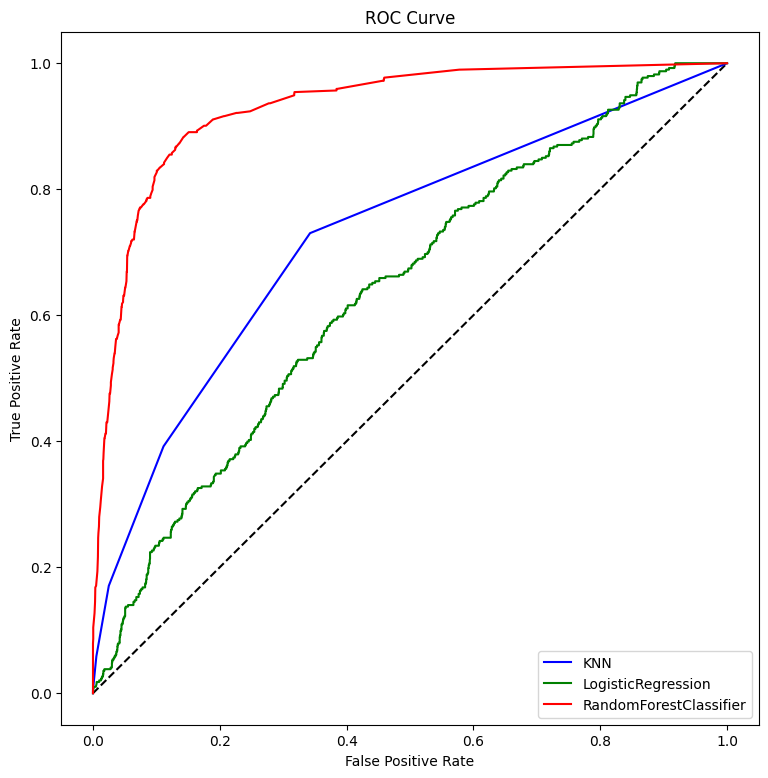

In [82]:
#plot ROC Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
plt.plot([0, 1], [0, 1], 'k--')
estimators =[pipeline_knn, pipeline_logreg, rfmodel]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier']
colors = ['b', 'g', 'r']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=classifiers[i],color=colors[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Recall Precision Curve')

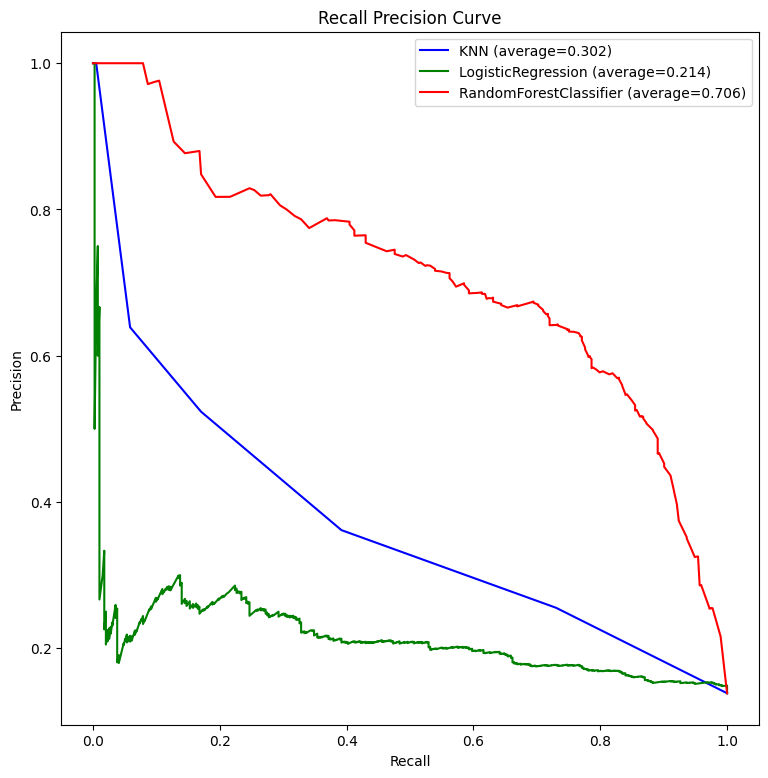

In [83]:
#plot Recall-Precision Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
estimators =[pipeline_knn, pipeline_logreg, rfmodel]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier']
colors = ['b', 'g', 'r']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test,y_pred_prob)
    average_precision= average_precision_score(y_test, y_pred_prob, average="micro")
    plt.plot(recall, precision, label='%s (average=%.3f)'%(classifiers[i],average_precision), color=colors[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Recall Precision Curve')

**Predicting Backorders in Inventory Mangement Context. Original dataset from Kaggle's "Can You Predict Product Backorders?",**

In [84]:
from sklearn.impute import SimpleImputer

In [86]:
# Loading the files
cols=range(0,23)
train = pd.read_csv('/content/drive/MyDrive/product_train.csv', usecols=cols)
test = pd.read_csv('/content/drive/MyDrive/product_train.csv', usecols=cols)

masterData = train.append(test)
print("masterData shape:",masterData.shape)

masterData shape: (500156, 23)


<ipython-input-86-f11729fb338e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  masterData = train.append(test)


In [87]:
masterData.describe()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,5.001560e+05,5.001560e+05,500156.000000,500156.000000,5.001560e+05,5.001560e+05,5.001560e+05,500156.000000,5.001560e+05,5.001560e+05,5.001560e+05,500156.000000,500156.000000,500156.000000,500156.000000,500156.000000
mean,3.445092e+06,3.530814e+02,7.831764,43.495673,1.928422e+02,3.618791e+02,5.306028e+02,54.319968,1.785464e+02,3.532202e+02,5.353359e+02,51.258775,1.746255,0.772383,0.776106,0.682995
std,7.774579e+05,5.734552e+03,6.760715,1076.527446,5.728247e+03,1.012270e+04,1.468181e+04,1562.465003,5.188465e+03,1.016468e+04,1.568774e+04,1111.365029,180.670487,0.241953,0.230465,42.306011
min,2.065611e+06,-3.034000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.984055e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.700000,0.690000,0.000000
50%,3.409472e+06,1.400000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,3.000000e+00,4.000000e+00,0.000000,0.000000,0.830000,0.830000,0.000000
75%,3.832658e+06,7.600000e+01,9.000000,0.000000,6.000000e+00,1.600000e+01,2.600000e+01,5.000000,1.600000e+01,3.300000e+01,5.000000e+01,3.000000,0.000000,0.970000,0.960000,0.000000
max,4.986449e+06,1.165770e+06,52.000000,276703.000000,1.242940e+06,2.056820e+06,3.103460e+06,358011.000000,1.094112e+06,2.123946e+06,3.182148e+06,196869.000000,54868.000000,1.000000,1.000000,12000.000000


In [88]:
def process(raw_file):
    # The following are strategies adopted to sanitize the raw data:
    #1.0 Binaries are converted from strings ('Yes' and 'No') to 1 and 0.
    #2.0 The attributes related to quantities are normalized(std dev equal to 1) per row. Thereby, with the normalization,
    # the orders with different magnitudes are approximated.
    #Missing values for lead tims and perf month average are replaced using the series median and mean by leverage the usage of
    #Impute library function in sklearn.

    #Impute the missing values with the median and rest with NA drop them
    imputer = SimpleImputer(missing_values= np.nan, strategy='median')
    raw_file['lead_time'] = imputer.fit_transform(raw_file['lead_time'].values.reshape(-1, 1))

    raw_file = raw_file.dropna()
    imp = SimpleImputer(missing_values = -99, strategy = 'median')
    for col in ['perf_6_month_avg', 'perf_12_month_avg']:
        raw_file[col] = imp.fit_transform(raw_file[col].values.reshape(-1, 1))

    #converting to binaries
    for col in ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
               'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
        raw_file[col] = (raw_file[col] == 'Yes').astype(int)

    #Normalization
    from sklearn.preprocessing import normalize
    quantifiable_fields = ['national_inv', 'in_transit_qty', 'forecast_3_month',
                          'forecast_6_month', 'forecast_9_month', 'min_bank',
                          'local_bo_qty', 'pieces_past_due', 'sales_1_month',
                          'sales_3_month', 'sales_6_month', 'sales_9_month']
    raw_file[quantifiable_fields] = normalize(raw_file[quantifiable_fields], axis = 1)
    return raw_file

processed_master_data = process(masterData)

processed_master_data.head(50)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3921548,0.804030,12.0,0.000000,0.000000,0.000000,0.000000,0.100504,0.100504,0.201008,...,0.000000,0.63,0.75,0.000000,0,0,0,1,0,0
1,3191009,0.107246,2.0,0.042640,0.202863,0.487130,0.779149,0.056853,0.126628,0.191234,...,0.000000,0.68,0.66,0.000000,0,0,0,1,0,0
2,2935810,0.984732,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123091,...,0.000000,0.73,0.78,0.000000,0,0,0,1,0,0
3,2205847,0.075443,4.0,0.153319,0.170355,0.389382,0.542701,0.065708,0.219027,0.399117,...,0.000000,0.73,0.78,0.000000,0,0,1,1,0,0
4,4953497,1.000000,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.81,0.74,0.000000,0,0,0,1,0,0
5,2286884,0.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.91,0.96,0.000000,0,0,0,1,0,0
6,3867350,1.000000,52.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.59,0.70,0.000000,1,0,0,0,0,0
7,2138874,0.288936,8.0,0.066495,0.137739,0.365722,0.517710,0.048288,0.159904,0.357806,...,0.000000,0.99,0.99,0.000792,0,0,0,1,0,0
8,4010669,0.995893,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.84,0.76,0.000000,0,0,0,1,0,0
9,2288075,1.000000,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.74,0.71,0.000000,0,0,0,1,0,0


Explained variance ratio: 34.34%
[0.23156542 0.11183628]


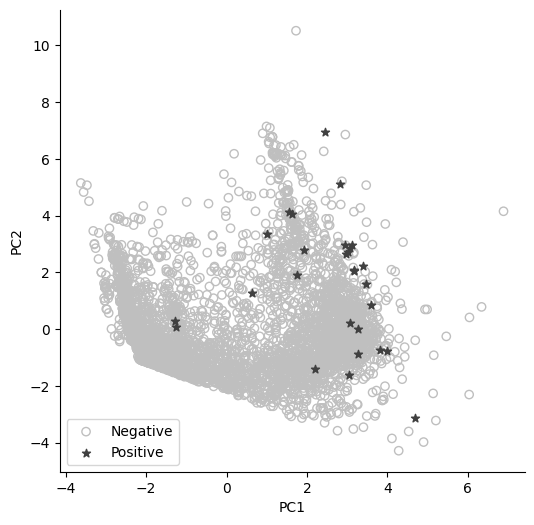

In [89]:
#Giving the general interpretation of the dataset through 2d plots using PCA.

def plot_2d(X, y, title=''):
    """
    Plot the two major components using PCA, giving a general interpretation of
    the dataset.
    """
    from sklearn.preprocessing import StandardScaler
    X_std = StandardScaler().fit_transform(X)

    from sklearn.decomposition import PCA
    dec = PCA(n_components=2)
    X_reduced = dec.fit_transform(X_std)

    f, ax = plt.subplots(figsize=(6,6))
    ax.scatter(X_reduced[y==0,0], X_reduced[y==0,1],
               facecolors='none', edgecolors='0.75', label="Negative")
    ax.scatter(X_reduced[y==1,0], X_reduced[y==1,1], c='0.25', marker='*',
               label='Positive')
    ax.legend(loc='lower left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    print ("Explained variance ratio: %.2f%%" %
           (100*dec.explained_variance_ratio_.sum()))
    print (dec.explained_variance_ratio_)
    #plt.savefig('img/plot2d.jpeg',format='jpeg',bbox_inches='tight',dpi=450)
    plt.show()

sample = processed_master_data.sample(5000, random_state = 36)
x_sample = sample.drop('went_on_backorder', axis = 1).values
y_sample = sample['went_on_backorder'].values

plot_2d(x_sample, y_sample)

In [90]:
#Prepare the data for the modeling
X = pd.DataFrame(processed_master_data.columns)
X = processed_master_data[processed_master_data.columns]
y = processed_master_data['went_on_backorder']
X.shape, y.shape

((500156, 23), (500156,))

In [91]:
#get the 30% sample data for model explorations
X_sample, X_data, y_sample, y_data = train_test_split(X, y, test_size = 0.99, random_state = 42)
X_sample.shape, y_sample.shape, X_data.shape, y_data.shape

((5001, 23), (5001,), (495155, 23), (495155,))

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.10, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 23), (501, 23), (4500,), (501,))

# **KNN MODEL**

In [93]:
#KNN
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_jobs = -1))]

#Create the pipeline:pipeline
pipeline_knn = Pipeline(steps)

#Fit to the training set
pipeline_knn.fit(X_train, y_train)
knn_prediction = pipeline_knn.predict(X_test)
#getting the classification report
knn_report = classification_report(y_test, knn_prediction)
#print the report
print(knn_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00         2

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



# **SVV MODEL**

In [94]:
#Train default SVC on the data and getting the basic results
steps = [('scaler', StandardScaler()),
        ('svc', svm.SVC(class_weight = 'balanced'))]

#Create the pipeline : pipeline
pipeline_svc = Pipeline(steps)

#Fit to the training set
pipeline_svc.fit(X_train, y_train)
svc_prediction = pipeline_svc.predict(X_test)

#get the classification report
svc_report = classification_report(y_test, svc_prediction)

#print the report
print(svc_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00         2

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



# **LOGISTIC REGRESSION**

In [95]:
#Train the deault LogisticRegression model
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight = 'balanced'))]

#Create the pipeline : pipeline
pipeline_logreg = Pipeline(steps)

#Fit to the training set
pipeline_logreg.fit(X_train, y_train)
logreg_prediction = pipeline_logreg.predict(X_test)

#get the classification report
logreg_report = classification_report(y_test, logreg_prediction)

#print the report
print(logreg_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00         2

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



# **RANDOM FOREST**

In [96]:
#Train the default RandomForest classifier model
rfmodel = RandomForestClassifier(random_state = 32)
#Fit to the training set
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict(X_test)
#get the classification report
rfmodel_report = classification_report(y_test, rfmodel_prediction)
#print the report
print(rfmodel_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00         2

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501



Text(0.5, 1.0, 'ROC Curve')

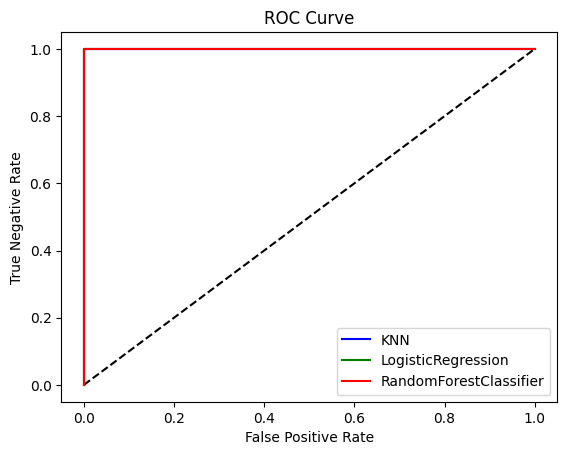

In [102]:
#Plot the ROC Curves
fig, ax1 = plt.subplots()
plt.plot([0, 1], [0, 1], 'k--')
estimators = [pipeline_knn, pipeline_logreg, rfmodel]
classifiers = ['KNN', 'LogisticRegression', 'RandomForestClassifier']
colors = ['b', 'g', 'r']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label = classifiers[i], color = colors[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.legend(loc = 4)
plt.title('ROC Curve')

## **THANKYOU**







